# **Molecular Modeling Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

>
In **Part 2**, Descriptor Calculation and Exploratory Data Analysis were performed.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-11-16 19:07:11--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   113MB/s    in 0.7s    

2024-11-16 19:07:12 (113 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_data_drug_preprocessed.csv')

[link text](https://)## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
!pip install numpy
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.5 MB/s 


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

import numpy as np
from rdkit import Chem # Import Chem within the function's scope
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    # Assuming 'pd' refers to pandas, import it if not already done
    import pandas as pd
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,302.341,3.46692,2.0,5.0
1,328.379,4.03590,2.0,5.0
2,305.316,3.90260,2.0,4.0
3,319.343,4.21102,2.0,4.0
4,345.381,4.78000,2.0,4.0
5,327.391,4.64090,2.0,4.0
6,348.454,4.71850,3.0,5.0
7,320.400,3.79580,3.0,5.0
8,295.321,3.62680,2.0,4.0
9,320.356,2.58660,3.0,5.0


In [ ]:
from google.colab import data_table

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL549536,Cc1cc(Nc2nc(-c3ccncc3)nc3ccccc23)n[nH]1,1350.0,intermediate
1,CHEMBL2017707,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(-c3ccncc3)nc2c1,322.0,active
2,CHEMBL2017708,Fc1ccc(-c2nc(Nc3cc[nH]n3)c3ccccc3n2)cc1,453.0,active
3,CHEMBL2017709,Cc1cc(Nc2nc(-c3ccc(F)cc3)nc3ccccc23)n[nH]1,1162.0,intermediate
4,CHEMBL2017710,Fc1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,223.0,active
5,CHEMBL2017711,c1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,440.0,active
6,CHEMBL2017712,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NC3CCCCC3)nc2c1,107.0,active
7,CHEMBL2017713,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NCC3CC3)nc2c1,428.0,active
8,CHEMBL2017714,Fc1ccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)cc1,375.0,active
9,CHEMBL2017715,NC(=O)c1cccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)c1,384.0,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL549536,Cc1cc(Nc2nc(-c3ccncc3)nc3ccccc23)n[nH]1,1350.0,intermediate,302.341,3.46692,2.0,5.0
1,CHEMBL2017707,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(-c3ccncc3)nc2c1,322.0,active,328.379,4.03590,2.0,5.0
2,CHEMBL2017708,Fc1ccc(-c2nc(Nc3cc[nH]n3)c3ccccc3n2)cc1,453.0,active,305.316,3.90260,2.0,4.0
3,CHEMBL2017709,Cc1cc(Nc2nc(-c3ccc(F)cc3)nc3ccccc23)n[nH]1,1162.0,intermediate,319.343,4.21102,2.0,4.0
4,CHEMBL2017710,Fc1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,223.0,active,345.381,4.78000,2.0,4.0
5,CHEMBL2017711,c1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,440.0,active,327.391,4.64090,2.0,4.0
6,CHEMBL2017712,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NC3CCCCC3)nc2c1,107.0,active,348.454,4.71850,3.0,5.0
7,CHEMBL2017713,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NCC3CC3)nc2c1,428.0,active,320.400,3.79580,3.0,5.0
8,CHEMBL2017714,Fc1ccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)cc1,375.0,active,295.321,3.62680,2.0,4.0
9,CHEMBL2017715,NC(=O)c1cccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)c1,384.0,active,320.356,2.58660,3.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,55.000000
mean,2596.654545
std,6160.625708
min,23.000000
25%,87.500000
50%,393.000000
75%,2045.000000
max,40000.000000


In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL549536,Cc1cc(Nc2nc(-c3ccncc3)nc3ccccc23)n[nH]1,intermediate,302.341,3.46692,2.0,5.0,1350.0
1,CHEMBL2017707,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(-c3ccncc3)nc2c1,active,328.379,4.03590,2.0,5.0,322.0
2,CHEMBL2017708,Fc1ccc(-c2nc(Nc3cc[nH]n3)c3ccccc3n2)cc1,active,305.316,3.90260,2.0,4.0,453.0
3,CHEMBL2017709,Cc1cc(Nc2nc(-c3ccc(F)cc3)nc3ccccc23)n[nH]1,intermediate,319.343,4.21102,2.0,4.0,1162.0
4,CHEMBL2017710,Fc1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,active,345.381,4.78000,2.0,4.0,223.0
5,CHEMBL2017711,c1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,active,327.391,4.64090,2.0,4.0,440.0
6,CHEMBL2017712,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NC3CCCCC3)nc2c1,active,348.454,4.71850,3.0,5.0,107.0
7,CHEMBL2017713,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NCC3CC3)nc2c1,active,320.400,3.79580,3.0,5.0,428.0
8,CHEMBL2017714,Fc1ccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)cc1,active,295.321,3.62680,2.0,4.0,375.0
9,CHEMBL2017715,NC(=O)c1cccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)c1,active,320.356,2.58660,3.0,5.0,384.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,55.000000
mean,2596.654545
std,6160.625708
min,23.000000
25%,87.500000
50%,393.000000
75%,2045.000000
max,40000.000000


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL549536,Cc1cc(Nc2nc(-c3ccncc3)nc3ccccc23)n[nH]1,intermediate,302.341,3.46692,2.0,5.0,5.869666
1,CHEMBL2017707,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(-c3ccncc3)nc2c1,active,328.379,4.03590,2.0,5.0,6.492144
2,CHEMBL2017708,Fc1ccc(-c2nc(Nc3cc[nH]n3)c3ccccc3n2)cc1,active,305.316,3.90260,2.0,4.0,6.343902
3,CHEMBL2017709,Cc1cc(Nc2nc(-c3ccc(F)cc3)nc3ccccc23)n[nH]1,intermediate,319.343,4.21102,2.0,4.0,5.934794
4,CHEMBL2017710,Fc1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,active,345.381,4.78000,2.0,4.0,6.651695
5,CHEMBL2017711,c1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,active,327.391,4.64090,2.0,4.0,6.356547
6,CHEMBL2017712,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NC3CCCCC3)nc2c1,active,348.454,4.71850,3.0,5.0,6.970616
7,CHEMBL2017713,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NCC3CC3)nc2c1,active,320.400,3.79580,3.0,5.0,6.368556
8,CHEMBL2017714,Fc1ccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)cc1,active,295.321,3.62680,2.0,4.0,6.425969
9,CHEMBL2017715,NC(=O)c1cccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)c1,active,320.356,2.58660,3.0,5.0,6.415669


In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors','pIC50']
df3 = df_final[selection]
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL549536,Cc1cc(Nc2nc(-c3ccncc3)nc3ccccc23)n[nH]1,intermediate,302.341,3.46692,2.0,5.0,5.869666
1,CHEMBL2017707,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(-c3ccncc3)nc2c1,active,328.379,4.03590,2.0,5.0,6.492144
2,CHEMBL2017708,Fc1ccc(-c2nc(Nc3cc[nH]n3)c3ccccc3n2)cc1,active,305.316,3.90260,2.0,4.0,6.343902
3,CHEMBL2017709,Cc1cc(Nc2nc(-c3ccc(F)cc3)nc3ccccc23)n[nH]1,intermediate,319.343,4.21102,2.0,4.0,5.934794
4,CHEMBL2017710,Fc1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,active,345.381,4.78000,2.0,4.0,6.651695
5,CHEMBL2017711,c1ccc(-c2nc(Nc3cc(C4CC4)[nH]n3)c3ccccc3n2)cc1,active,327.391,4.64090,2.0,4.0,6.356547
6,CHEMBL2017712,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NC3CCCCC3)nc2c1,active,348.454,4.71850,3.0,5.0,6.970616
7,CHEMBL2017713,c1ccc2c(Nc3cc(C4CC4)[nH]n3)nc(NCC3CC3)nc2c1,active,320.400,3.79580,3.0,5.0,6.368556
8,CHEMBL2017714,Fc1ccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)cc1,active,295.321,3.62680,2.0,4.0,6.425969
9,CHEMBL2017715,NC(=O)c1cccc(-c2nccc(Nc3cc(C4CC4)[nH]n3)n2)c1,active,320.356,2.58660,3.0,5.0,6.415669


In [ ]:
df3.to_csv('bioactivity_drug_data_pIC50_curated_preprocessed.csv')

In [ ]:
df_final.pIC50.describe()

,pIC50
count,55.000000
mean,6.287527
std,0.814588
min,4.397940
25%,5.689464
50%,6.405607
75%,7.057999
max,7.638272


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

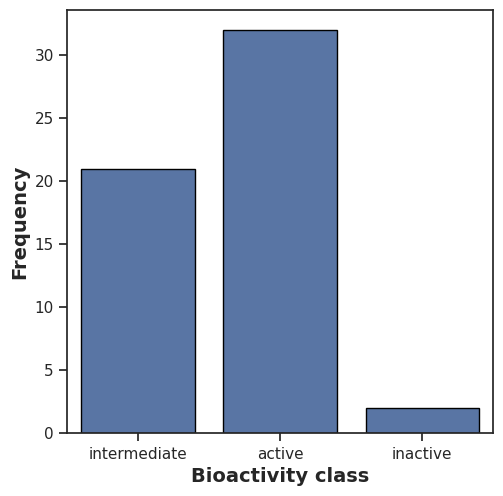

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df3, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.jpg')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

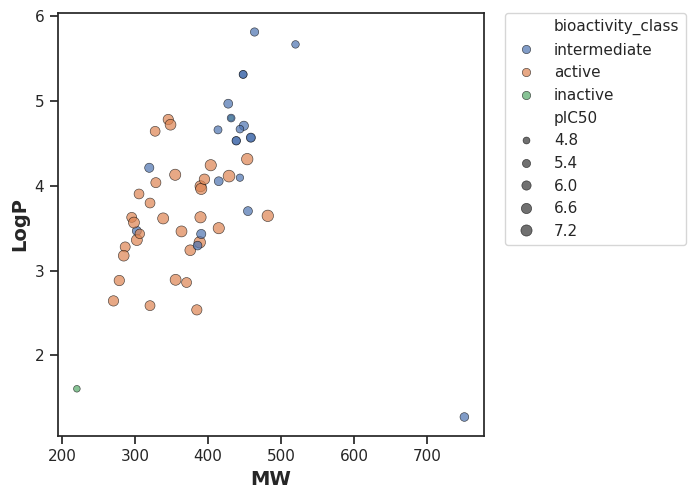

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df3, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.jpg')

### **Box plots**

#### **pIC50 value**

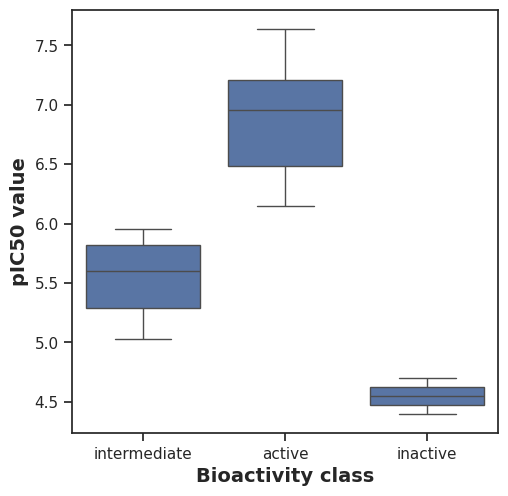

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.jpg')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df3[selection]
  active = df3[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df3[selection]
  inactive = df3[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,64.0,0.021115,0.05,Different distribution (reject H0)


In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu
  import pandas as pd # Import pandas

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df3[selection]
  active = df3[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df3[selection]
  inactive = df3[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  # Check if active and inactive are empty and handle the case
  if active.empty or inactive.empty:
    print(f"Warning: Either active or inactive group is empty for descriptor: {descriptor}")
    return None # Or handle this case differently as needed

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

#### **MW**

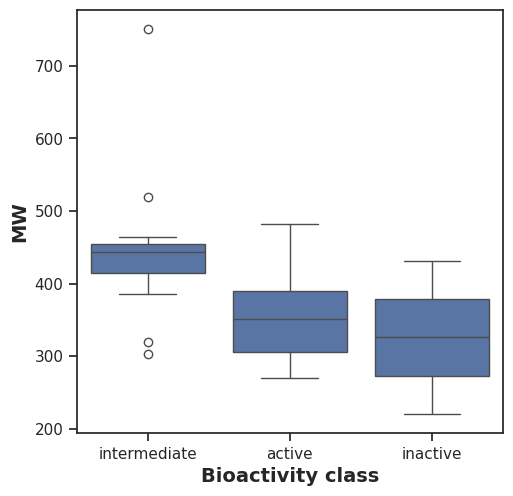

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.jpg')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,34.0,0.91257,0.05,Same distribution (fail to reject H0)


#### **LogP**

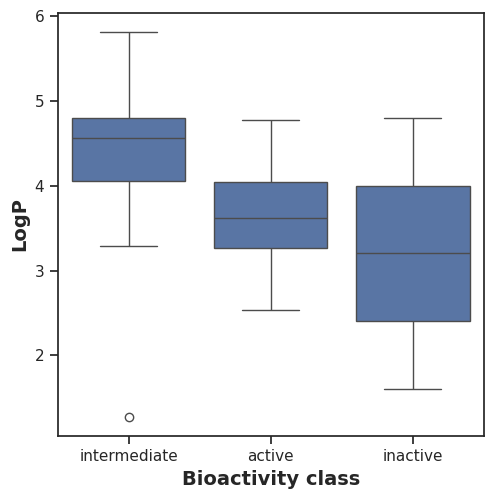

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.jpg')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,32.0,1.0,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

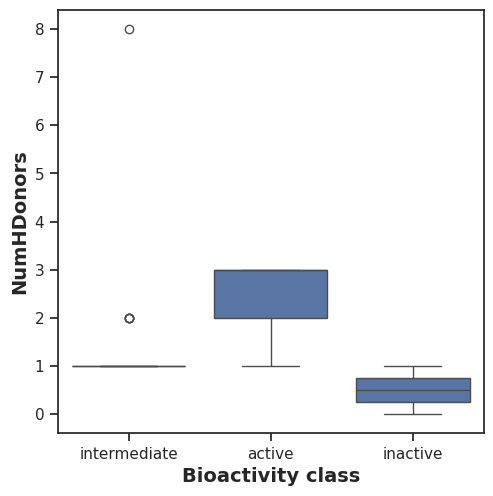

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.jpg')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,63.0,0.01299,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

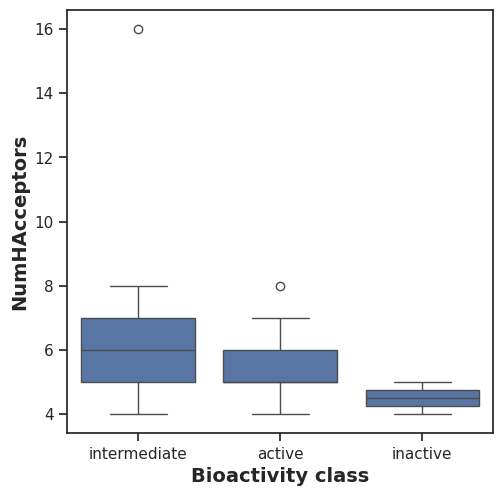

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.jpg')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,51.5,0.142833,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.jpg

  adding: mannwhitneyu_LogP.csv (deflated 6%)
  adding: bioactivity_drug_data_pIC50_curated_preprocessed.csv (deflated 71%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: bioactivity_data_drug_preprocessed.csv (deflated 79%)
  adding: plot_LogP.jpg (deflated 43%)
  adding: plot_NumHDonors.jpg (deflated 40%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 9%)
  adding: plot_MW.jpg (deflated 38%)
  adding: plot_MW_vs_LogP.jpg (deflated 34%)
  adding: plot_bioactivity_class.jpg (deflated 46%)
  adding: plot_ic50.jpg (deflated 37%)
  adding: plot_NumHAcceptors.jpg (deflated 40%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
